In [2]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [4]:
#images_folder = "/mnt/isegpu2/local/ADNI_AIBL/ADNI_AIBL_T1_normalized/train_NC_AD/"
images_folder = "/local/ADNI_AIBL/ADNI_AIBL_T1_normalized/train_NC_AD"

# Load and show one image

In [5]:
image_label = "A169891_normalized.nii.gz"
image_path = os.path.join(images_folder, image_label)

In [6]:
im = nib.load(image_path)
data = im.get_data()

In [7]:
data.shape

(91, 109, 91)

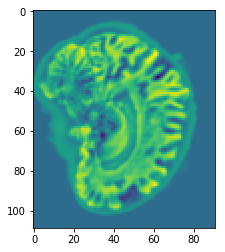

In [9]:
plt.imshow(data[52])

# Compare images

In [11]:
# Load meta information
file_path = "../data/raw/csv/adni_aibl__ad_hc.csv"
df = pd.read_csv(file_path)
records = df.to_dict('records')

In [37]:
# Compute per age difference
diffs = []
for i, r in enumerate(records):
    if i == 0:
        continue
    
    if i % 1000 == 0:
        print(i)

    last = records[i - 1]
    if (r['patient_label'] == last['patient_label'] and (r['age'] == last['age'])):
        # Load images
        label1 = last['image_label'] + "_normalized.nii.gz"
        label2 = r['image_label'] + "_normalized.nii.gz"
        im1 = nib.load(os.path.join(images_folder, label1)).get_data()
        im2 = nib.load(os.path.join(images_folder, label2)).get_data()
        diff = np.linalg.norm(im1 - im2)
        diffs.append(diff)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [38]:
diffs = np.array(diffs)
diffs.shape

(6672,)

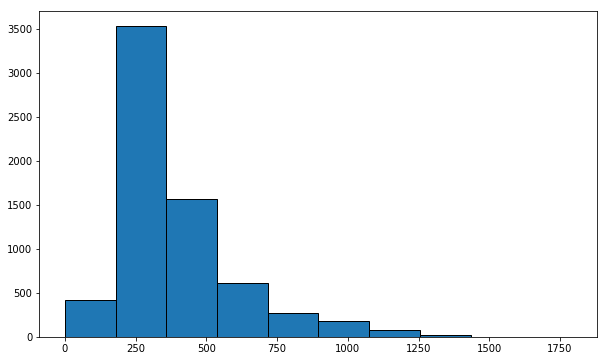

In [40]:
plt.figure(figsize=(10,6))
plt.hist(diffs, edgecolor="black")
plt.savefig("same_patien_same_age_image_difference_hist.pdf")

# Differnce between random images

In [21]:
n = len(records)

In [ ]:
n_samples = 1000
sample_diffs = []
for k in range(n_samples):
    if k > 0 and k % 100 == 0:
        print(k)
    i = np.random.randint(n)
    j = np.random.randint(n)
    label1 = records[i]['image_label'] + "_normalized.nii.gz"
    label2 = records[j]['image_label'] + "_normalized.nii.gz"
    im1 = nib.load(os.path.join(images_folder, label1)).get_data()
    im2 = nib.load(os.path.join(images_folder, label2)).get_data()
    diff = np.linalg.norm(im1 - im2)
    sample_diffs.append(diff)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [ ]:
sample_diffs = np.array(sample_diffs)

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(sample_diffs, edgecolor="black")